In [323]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/70.9 MB 469.7 kB/s eta 0:02:31
   ---------------------------------------- 0.1/70.9 MB 573.4 kB/s eta 0:02:04
   ---------------------------------------- 0.1/70.9 MB 595.3 kB/s eta 0:01:59
   ---------------------------------------- 0.1/70.9 MB 655.8 kB/s eta 0:01:48
   ---------------------------------------- 0.2/70.9 MB 655.4 kB/s eta 0:01:48
   ---------------------------------------- 0.2/70.9 MB 655.1 kB/s eta 0:01:48
   --------------------------------------

In [234]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import opendatasets as od
import tensorflow.compat.v2.feature_column as fc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import tensorflow as tf


In [208]:
od.download("https://www.kaggle.com/datasets/camnugent/california-housing-prices")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  navinduthesanka


Your Kaggle Key:

  ········


100%|████████████████████████████████████████████████████████████████████████████████| 400k/400k [00:01<00:00, 281kB/s]

In [245]:
dataset = pd.read_csv("california-housing-prices/housing.csv")

In [271]:
dataset = dataset.join(pd.get_dummies(dataset.ocean_proximity)).drop(["ocean_proximity"], axis =1)

In [272]:
dataset.dropna(inplace=True)

In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  uint8  
 10  INLAND              20433 non-null  uint8  
 11  ISLAND              20433 non-null  uint8  
 12  NEAR BAY            20433 non-null  uint8  
 13  NEAR OCEAN          20433 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 2.2 MB


In [274]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [249]:
x = dataset.drop(["median_house_value"], axis= 1)
y = dataset["median_house_value"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=4)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

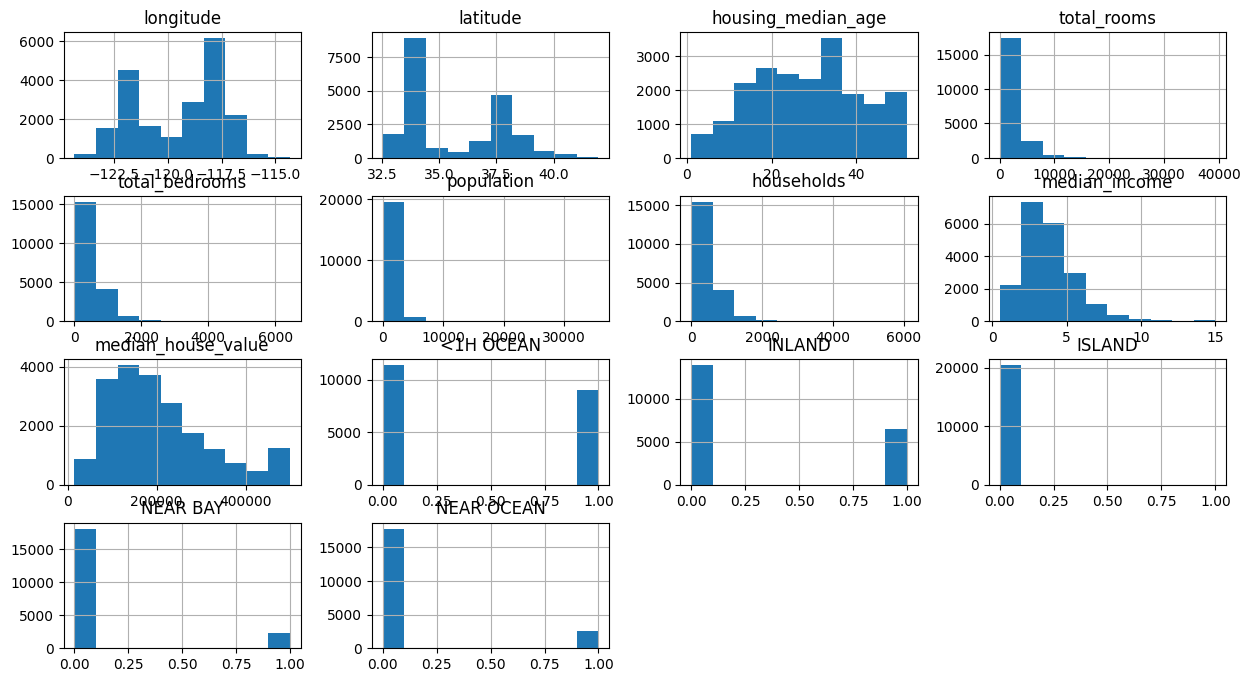

In [276]:
dataset.hist(figsize=(15,8))

<Axes: >

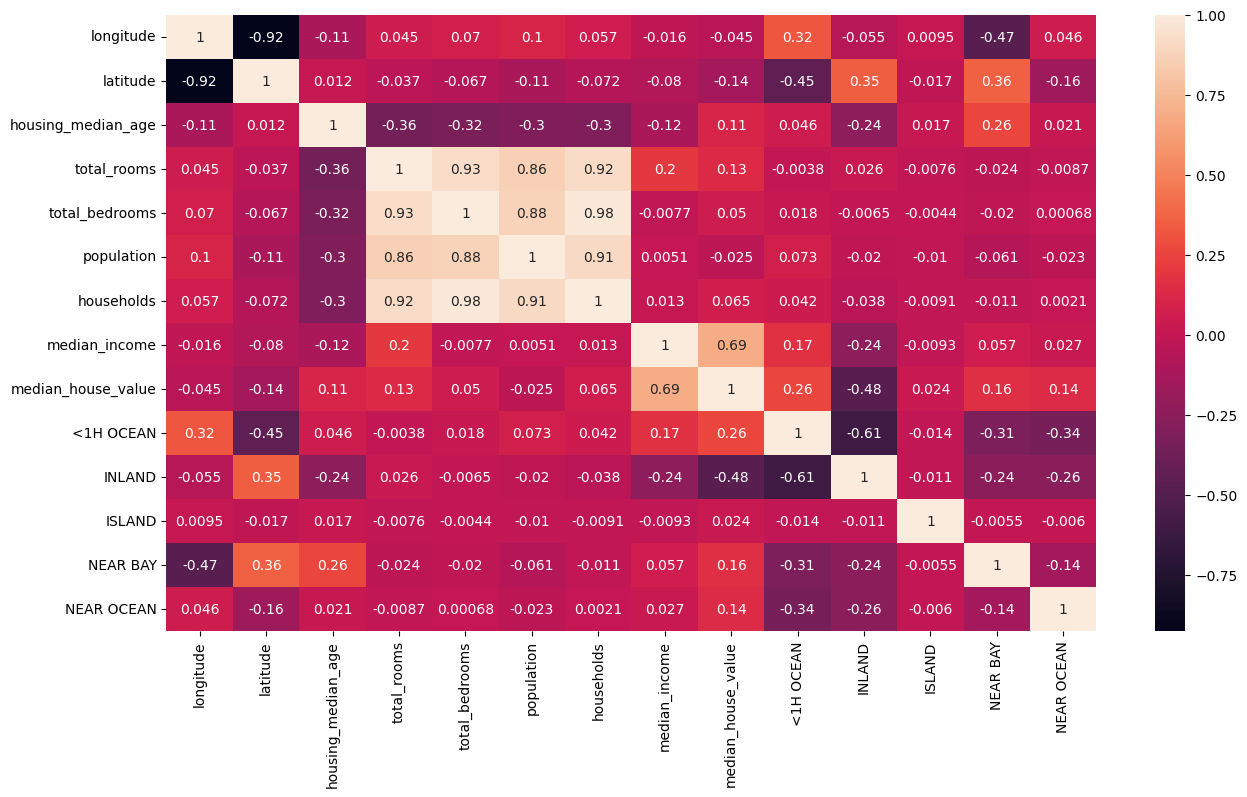

In [277]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True,)

In [278]:
dataset["total_rooms"] = np.log(dataset["total_rooms"] + 1)
dataset["total_bedrooms"] = np.log(dataset["total_bedrooms"] + 1)
dataset["population"] = np.log(dataset["population"] + 1)
dataset["households"] = np.log(dataset["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>]], dtype=object)

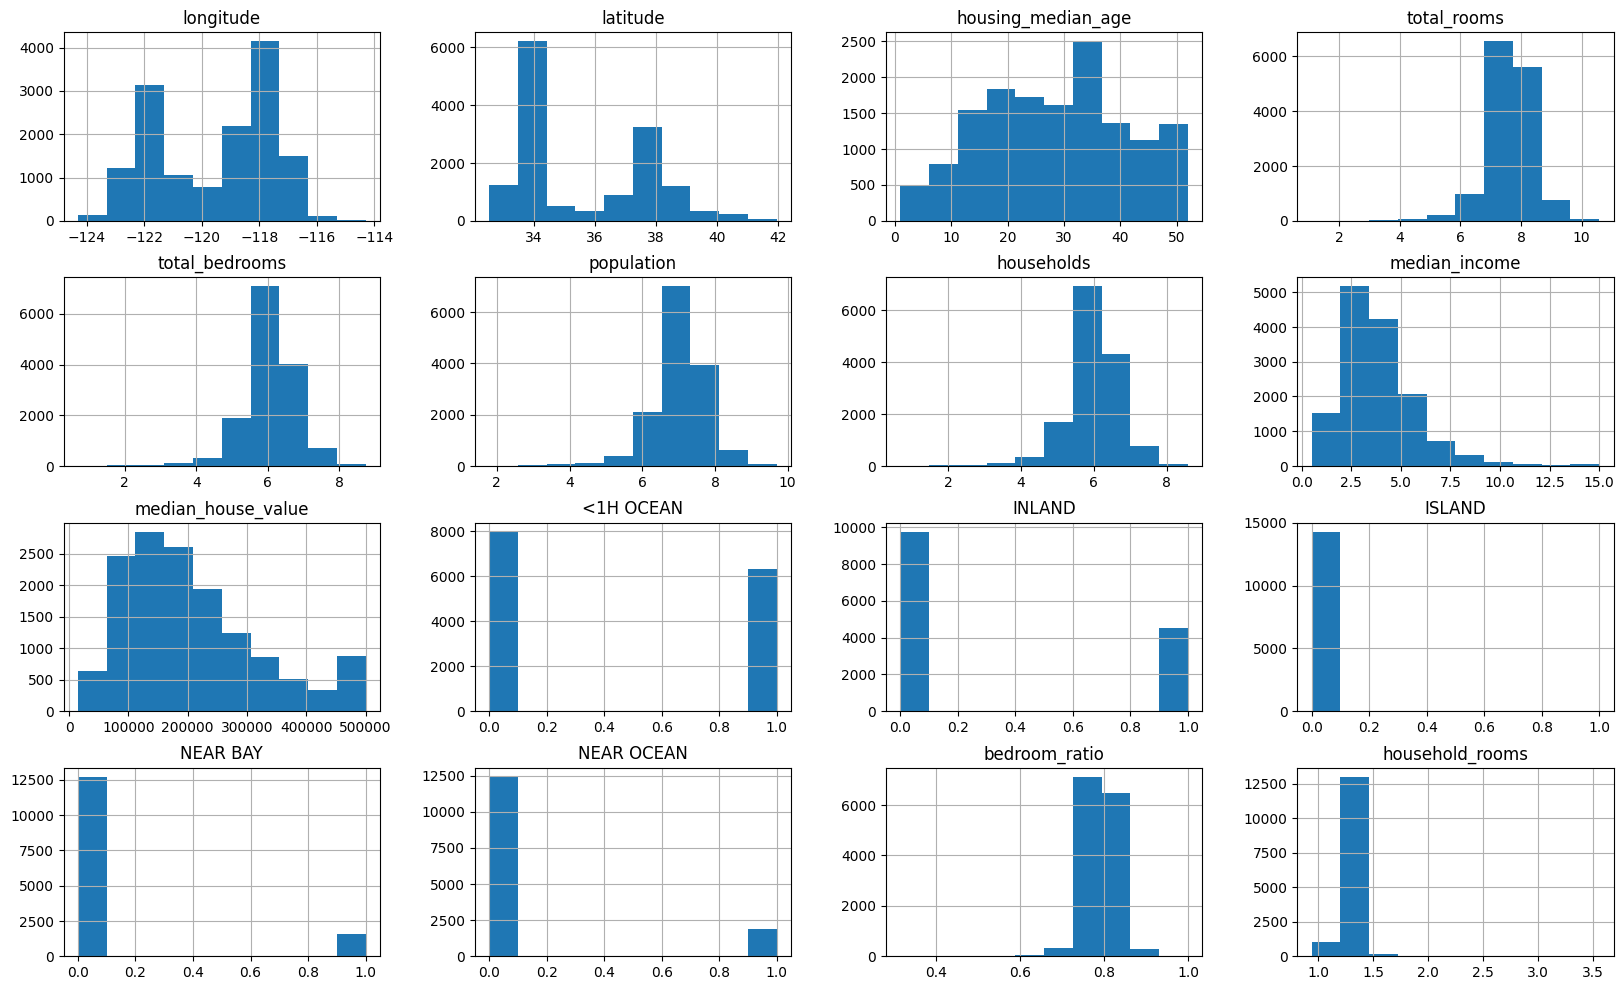

In [282]:
train_data.hist(figsize=(20,12))

<Axes: >

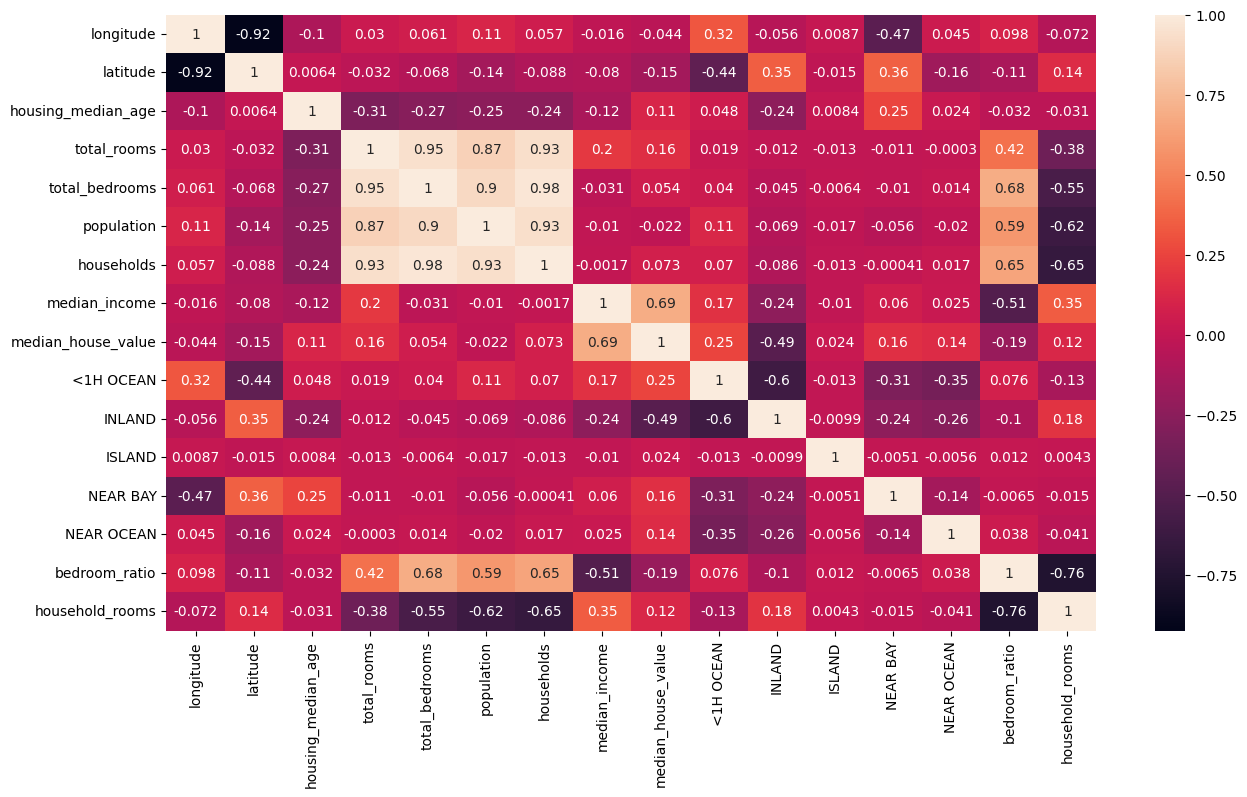

In [283]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

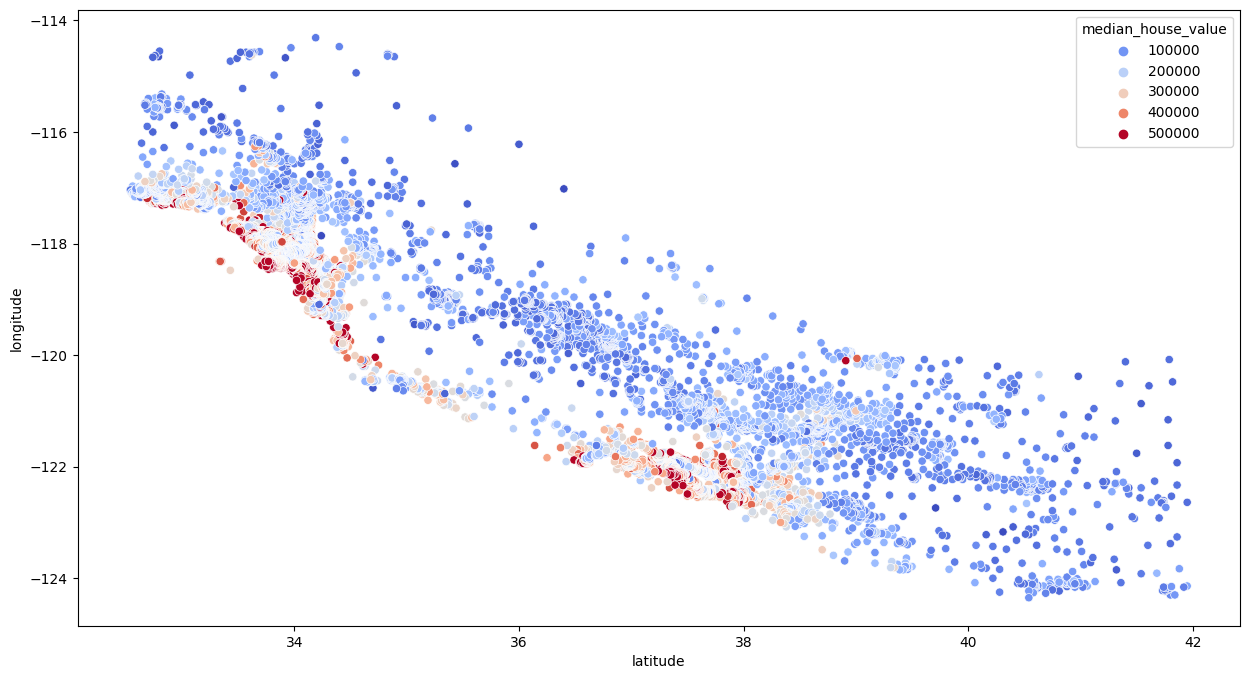

In [284]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data=dataset, hue="median_house_value", palette="coolwarm")

In [285]:
dataset["bedroom_ratio"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["household_rooms"] = dataset["total_rooms"]/dataset["households"]

<Axes: >

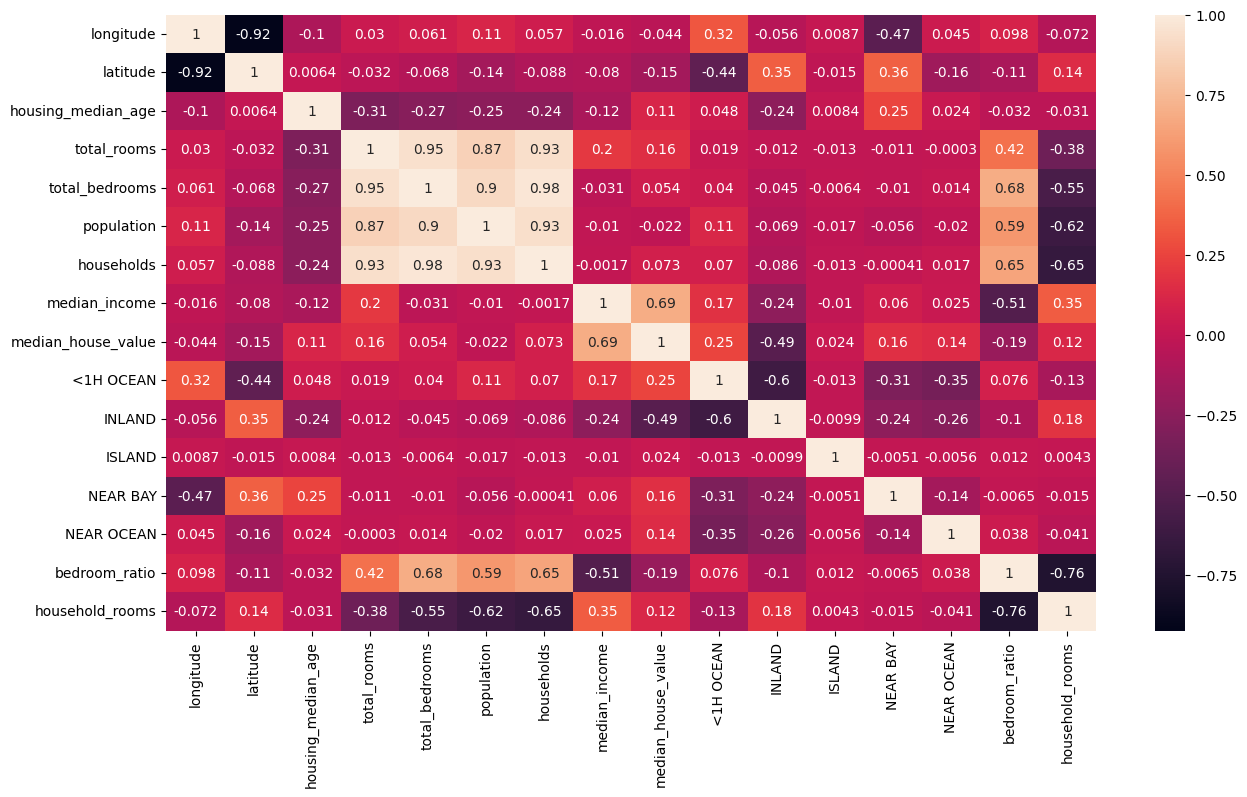

In [286]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [220]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [389]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_dim=8, activation='relu',input_shape=(15,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer= optimizer,
              loss= "binary_crossentropy",
              metrics="accuracy"
              
)

model.fit(x_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
447/447 [==============================] - 1s 835us/step - loss: -2161031424.0000 - accuracy: 0.0000e+00
Epoch 2/50
447/447 [==============================] - 0s 828us/step - loss: -41970970624.0000 - accuracy: 0.0000e+00
Epoch 3/50
447/447 [==============================] - 0s 828us/step - loss: -199872184320.0000 - accuracy: 0.0000e+00
Epoch 4/50
447/447 [==============================] - 0s 810us/step - loss: -526379089920.0000 - accuracy: 0.0000e+00
Epoch 5/50
447/447 [==============================] - 0s 806us/step - loss: -1054741102592.0000 - accuracy: 0.0000e+00
Epoch 6/50
447/447 [==============================] - 0s 833us/step - loss: -1803754799104.0000 - accuracy: 0.0000e+00
Epoch 7/50
447/447 [==============================] - 0s 830us/step - loss: -2786163949568.0000 - accuracy: 0.0000e+00
Epoch 8/50
447/447 [==============================] - 0s 828us/step - loss: -4021824782336.0000 - accuracy: 0.0000e+00
Epoch 9/50
447/447 [==============================] - 0

In [386]:
cvscores = []
scores = model.evaluate(x_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 0.00%
0.00% (+/- 0.00%)


In [387]:
loss = model.evaluate(x_test_scaled, y_test)
print(f'Test loss: {loss}')

192/192 [==============================] - 0s 1ms/step - loss: -3152771.7500 - accuracy: 0.0000e+00
Test loss: [-3152771.75, 0.0]


In [173]:
pred = model.predict(x_test_scaled)
print(pred)

44/44 [==============================] - 0s 954us/step
[[-0.01975106]
 [-0.01975106]
 [-0.01975106]
 ...
 [-0.01975106]
 [-0.01975106]
 [-0.01975106]]


In [297]:
x = dataset.drop(["median_house_value"], axis= 1)
y = dataset["median_house_value"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=4)

In [298]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [300]:
from sklearn.linear_model import LinearRegression



lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [301]:
lr.score(x_test_scaled,y_test)

0.6692076141750696

In [303]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [304]:
forest.score(x_test_scaled,y_test)

0.811203202456086

In [328]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=4)

In [360]:
param_grid2={
    "n_estimators":[7500],
    "gamma":[0.0000001,0.000001],
    "max_depth":[None],
    "learning_rate" :[0.01]
}

grid_search2 = GridSearchCV(estimator = xgb_model,
                            param_grid =param_grid2,
                            scoring="r2",
                            cv=5,
                            verbose=4,
                            return_train_score =True)

grid_search2.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END gamma=1e-07, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.983, test=0.837) total time=  35.8s
[CV 2/5] END gamma=1e-07, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.984, test=0.837) total time=  35.6s
[CV 3/5] END gamma=1e-07, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.982, test=0.834) total time=  35.5s
[CV 4/5] END gamma=1e-07, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.983, test=0.829) total time=  35.7s
[CV 5/5] END gamma=1e-07, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.983, test=0.833) total time=  36.8s
[CV 1/5] END gamma=1e-06, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.983, test=0.837) total time=  35.9s
[CV 2/5] END gamma=1e-06, learning_rate=0.01, max_depth=None, n_estimators=7500;, score=(train=0.984, test=0.837) total time=  34.8s
[CV 3/5] 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=4, ...),
             param_grid={'gamma': [1e-07, 1e-06], 'learning_rate': [0.01],
                         'max_depth': [None], 'n_estimators': [7500]},
             return_train_score=True, scoring='r2', verbose=4)

In [364]:
print(grid_search2.best_params_)

{'gamma': 1e-07, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 7500}


In [365]:
grid_search2.best_estimator_.score(x_test_scaled,y_test)

0.8359026030450191